# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Your Code Here

In [3]:

# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

# Configuration to set so that all the Seaborn figs come out with this size
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [12]:
titanic = pd.read_csv("../data/titanic.csv")
titanic.value_counts()
titanic


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [5]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [6]:
titanic.select_dtypes(exclude=object)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

#### Use the right visulalization to show the distribution of column `Age`.

In [7]:
sns.histplot(x=titanic.age, bins= 15)


AttributeError: 'DataFrame' object has no attribute 'age'

#### How does the bin size affect your plot?

In [8]:
"""
Whenever we have more bins the data will be more accurate but we will be less able to interpretate on an easy way the data. 
Making a correct decisions on the number of bins makes it easy for the audience to get the information quickly and for us to
detect general patterns, moreover having too much bins would make the plot too large or too small.
"""

'\nWhenever we have more bins the data will be more accurate but we will be less able to interpretate on an easy way the data. \nMaking a correct decisions on the number of bins makes it easy for the audience to get the information quickly and for us to\ndetect general patterns, moreover having too much bins would make the plot too large or too small.\n'

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

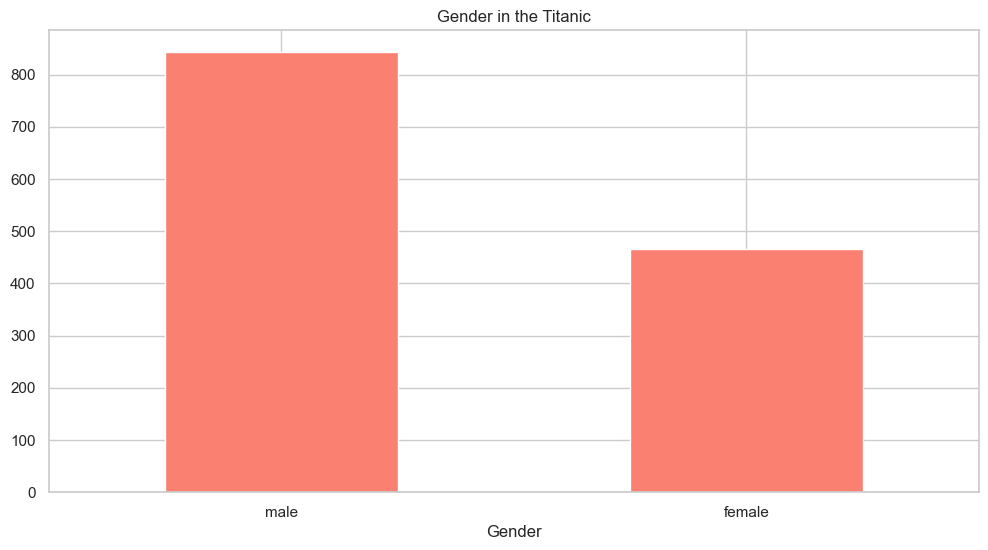

In [9]:
# Method 1 - matplotlib
titanic["Gender"].value_counts().plot(kind="bar", color="salmon", title="Gender in the Titanic")
plt.xticks(rotation=0);

/var/folders/hg/5fvxfx192g7d6pntmljmf7c00000gn/T/ipykernel_14139/4092293247.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=titanic.Gender, palette= "Set2");


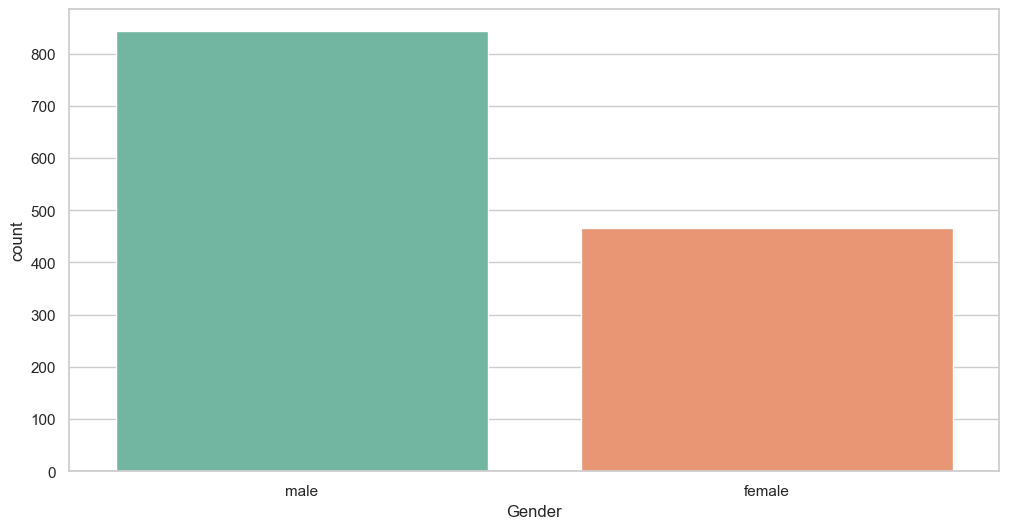

In [10]:
# Method 2 - seaborn
sns.countplot(x=titanic.Gender, palette= "Set2");

#### Use the right plot to visualize the column `Pclass`.

/var/folders/hg/5fvxfx192g7d6pntmljmf7c00000gn/T/ipykernel_14139/3621489620.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=titanic.Pclass, palette= "Set2");


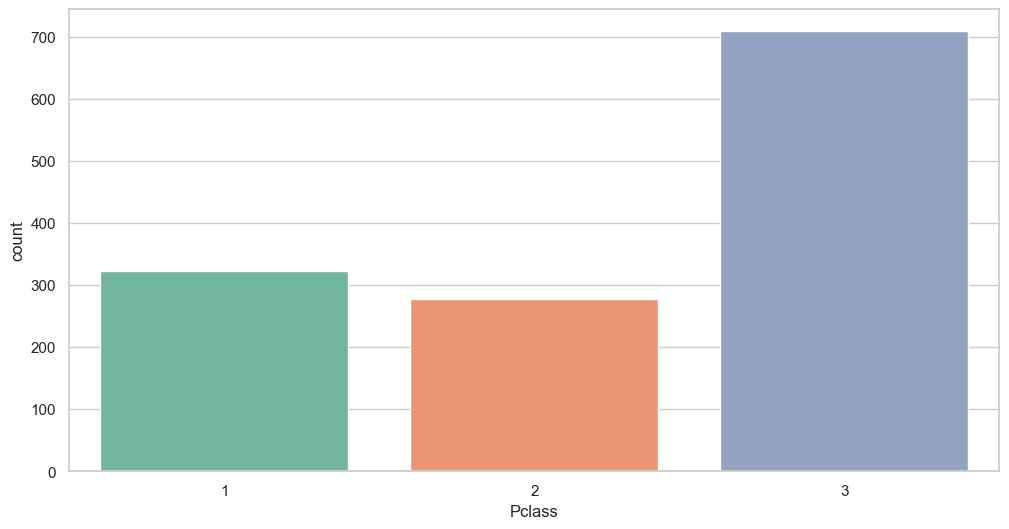

In [11]:
sns.countplot(x=titanic.Pclass, palette= "Set2");

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it and list all the info it's giving you.

[Hint](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

29.879185698255327
0.17
80.0


'\nWith a Histogram we are able to see in a quick way, but not an exact way the statistics of the feature age. We can see that the min value is closer to 0 the mean or average\nis between closest to 30 and the max value is closer to 80\n'

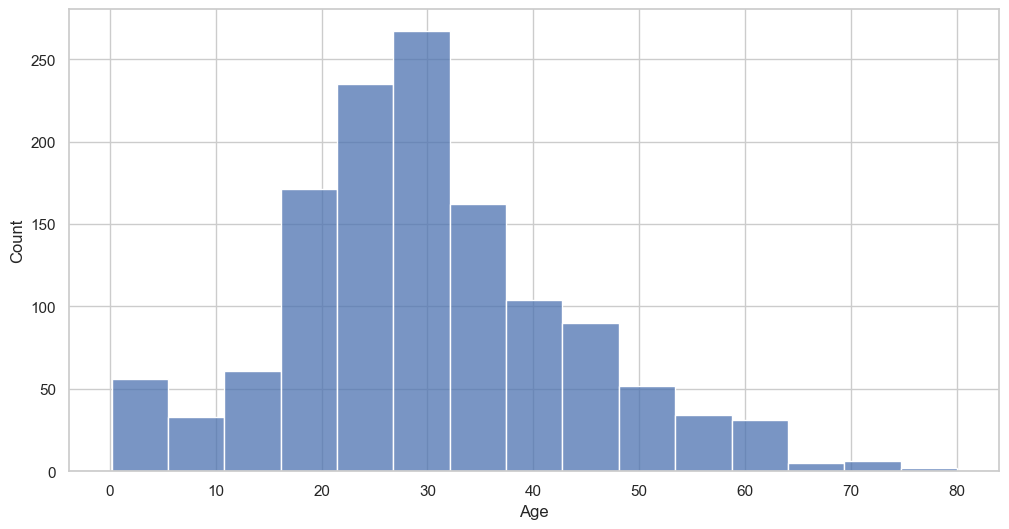

In [12]:
print(titanic.Age.mean())
print(titanic.Age.min())
print(titanic.Age.max())

sns.histplot(x=titanic.Age, bins=15);


'''
With a Histogram we are able to see in a quick way, but not an exact way the statistics of the feature age. We can see that the min value is closer to 0 the mean or average
is between closest to 30 and the max value is closer to 80
'''

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

' There is no relation in the data '

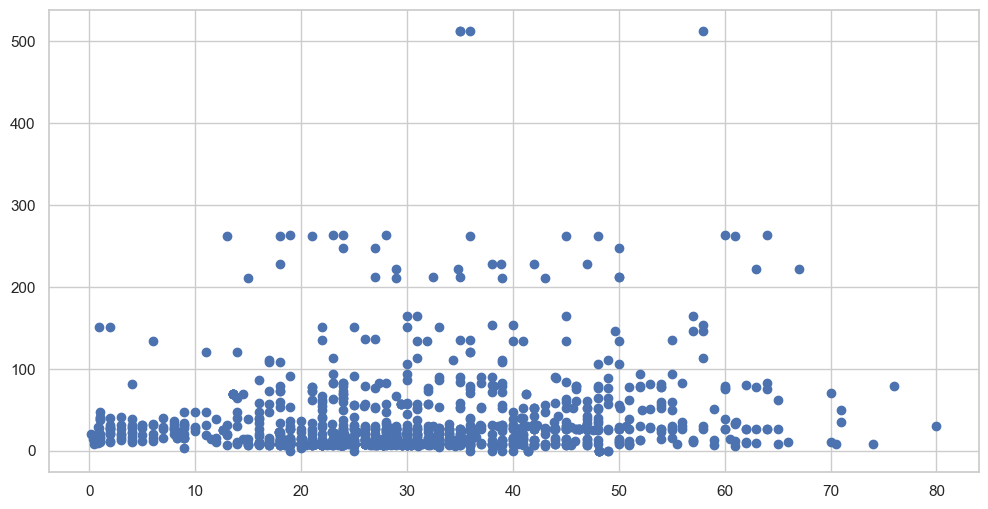

In [13]:
# Method 1 - matplotlib
plt.scatter(x=titanic.Age, y=titanic.Fare);

''' There is no relation in the data '''

' There is no relation in the data '

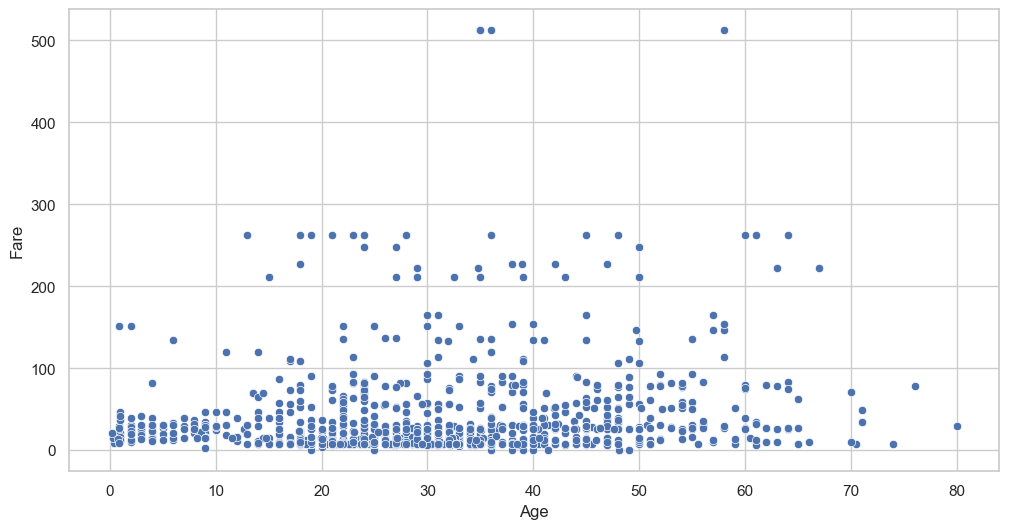

In [9]:
# Method 2 - seaborn
sns.scatterplot(x="Age", y="Fare", data=titanic);

''' There is no relation in the data '''

#### Plot the correlation matrix using seaborn.

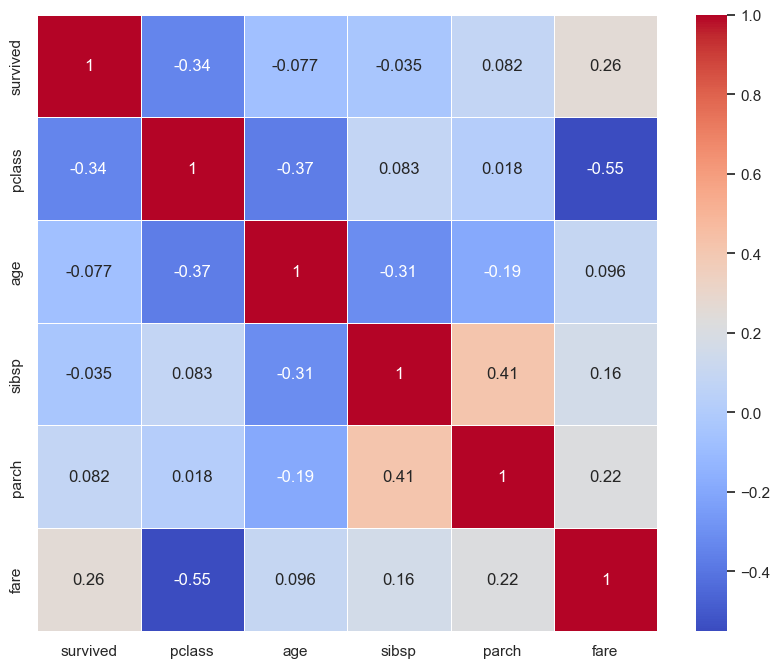

In [15]:

# Load the Titanic dataset from Seaborn
titanic = sns.load_dataset("titanic")

# Select only numeric columns for the correlation matrix
numeric_columns = titanic.select_dtypes(include=[float, int])

# Create a correlation matrix
corr_matrix = numeric_columns.corr()

# Set up the Matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Show the plot
plt.show()


#### What are the most correlated features?

In [10]:
'''
There are two correlations that we can highlight, te first on is
SibSp (number of brothers, sisters, stepbrothers or stepsisters) with the Perch (number of parents or sons)
with a correlation of 0.41. 

The second major correlation is Fare (priced payed) with the number of people that survived, with a correlation
of 0.26.
'''


'\nparch with sibsp\nsurvived with fare\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<Axes: xlabel='age', ylabel='Count'>

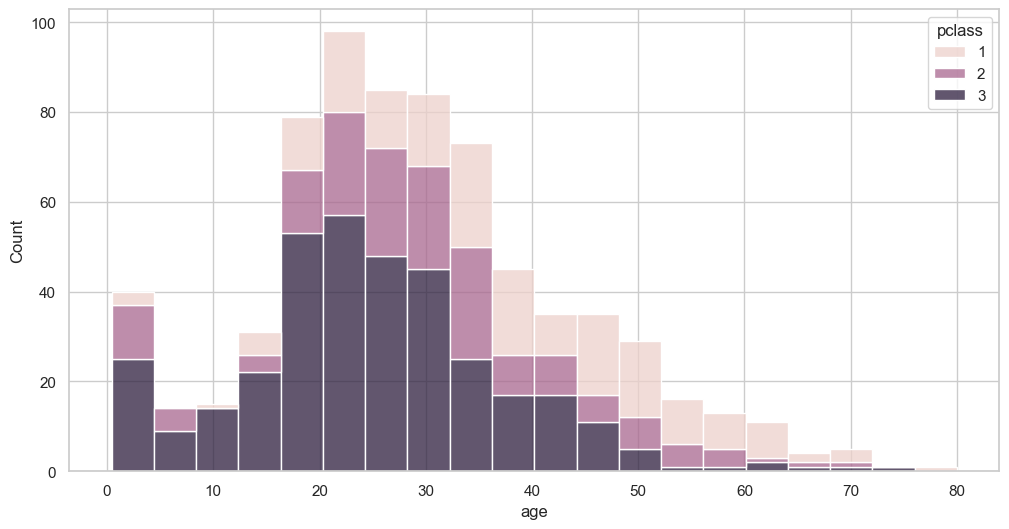

In [22]:
sns.histplot(data=titanic, x="age", hue="pclass", multiple="stack")

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

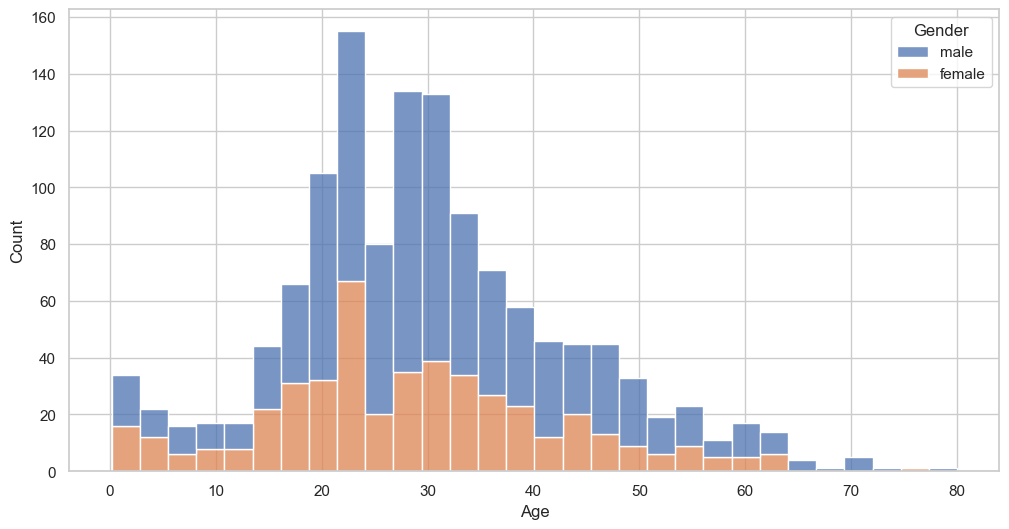

In [8]:
sns.histplot(data = titanic, x="Age", hue="Gender", multiple="stack");